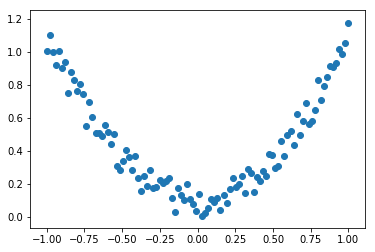

In [18]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.autograd import Variable
%matplotlib inline

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

#x,y = Variable(x),Variable(y)
# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()


In [19]:
class Net(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)

print(net)  # net 的结构

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


Loss=0.0041


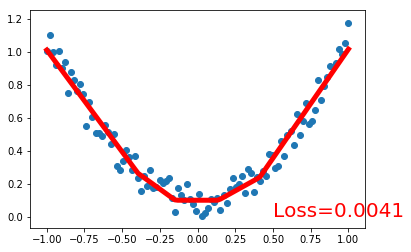

Loss=0.0041
Loss=0.0041
Loss=0.0041
Loss=0.0041
Loss=0.0041


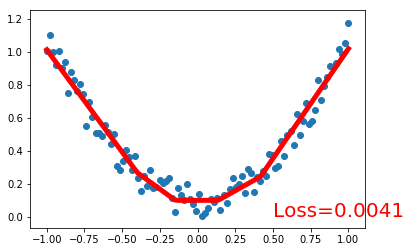

Loss=0.0040
Loss=0.0040
Loss=0.0040
Loss=0.0040
Loss=0.0040


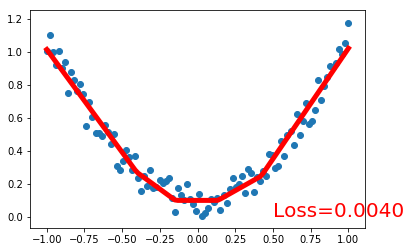

Loss=0.0040
Loss=0.0040
Loss=0.0040
Loss=0.0040
Loss=0.0040


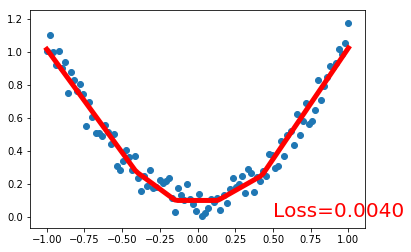

Loss=0.0040
Loss=0.0040
Loss=0.0040
Loss=0.0040
Loss=0.0040


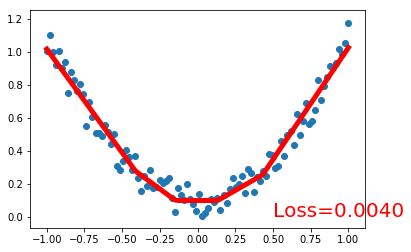

Loss=0.0039
Loss=0.0039
Loss=0.0039
Loss=0.0039
Loss=0.0039


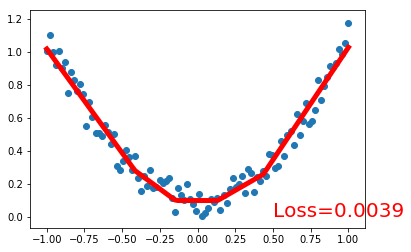

Loss=0.0039
Loss=0.0039
Loss=0.0039
Loss=0.0039
Loss=0.0039


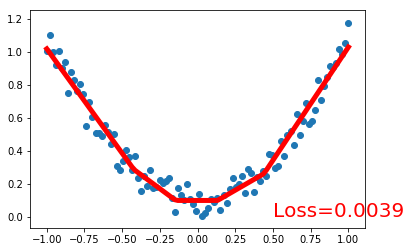

Loss=0.0039
Loss=0.0039
Loss=0.0039
Loss=0.0039
Loss=0.0039


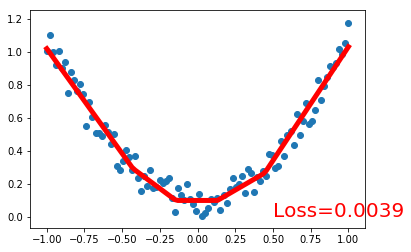

Loss=0.0038
Loss=0.0038
Loss=0.0038
Loss=0.0038
Loss=0.0038


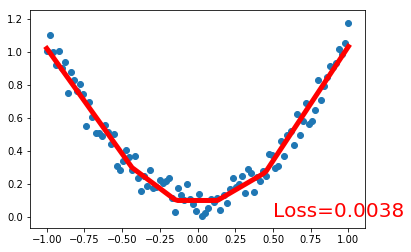

Loss=0.0038
Loss=0.0038
Loss=0.0038
Loss=0.0038
Loss=0.0038


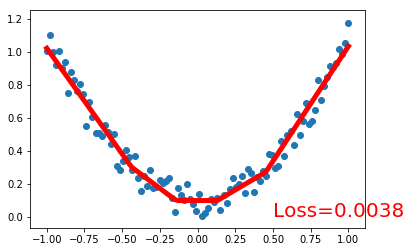

Loss=0.0038
Loss=0.0038
Loss=0.0038
Loss=0.0038
Loss=0.0038


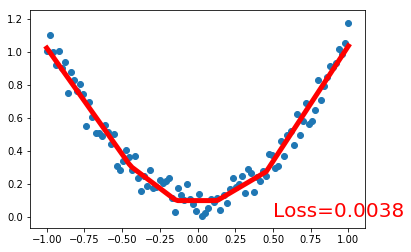

Loss=0.0038
Loss=0.0038
Loss=0.0038
Loss=0.0038
Loss=0.0038


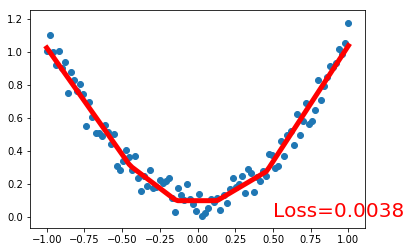

Loss=0.0038
Loss=0.0037
Loss=0.0037
Loss=0.0037
Loss=0.0037


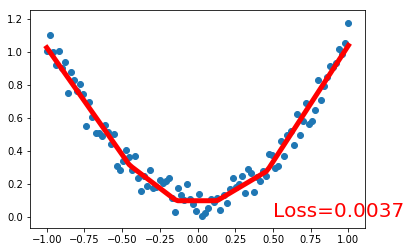

Loss=0.0037
Loss=0.0037
Loss=0.0037
Loss=0.0037
Loss=0.0037


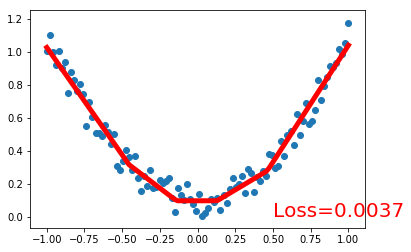

Loss=0.0037
Loss=0.0037
Loss=0.0037
Loss=0.0037
Loss=0.0037


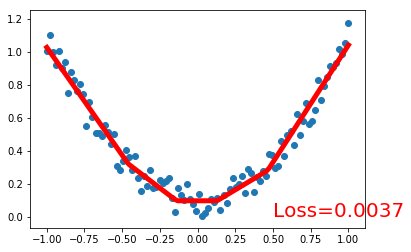

Loss=0.0037
Loss=0.0037
Loss=0.0037
Loss=0.0037
Loss=0.0037


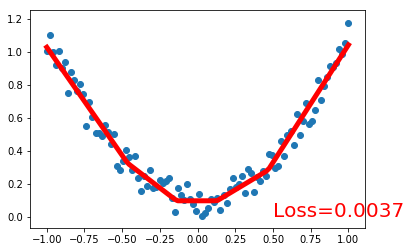

Loss=0.0037
Loss=0.0037
Loss=0.0037
Loss=0.0037
Loss=0.0037


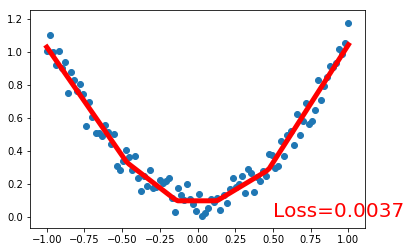

Loss=0.0037
Loss=0.0037
Loss=0.0037
Loss=0.0037
Loss=0.0037


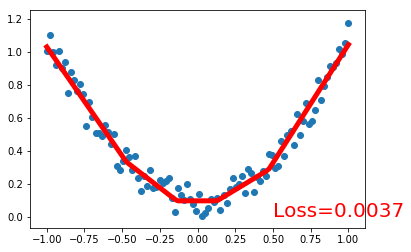

Loss=0.0037
Loss=0.0037
Loss=0.0037
Loss=0.0036
Loss=0.0036


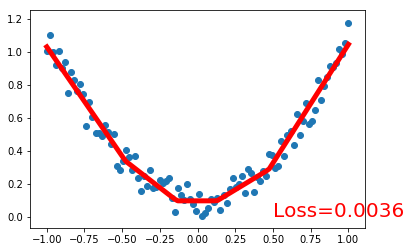

Loss=0.0036
Loss=0.0036
Loss=0.0036
Loss=0.0036
Loss=0.0036


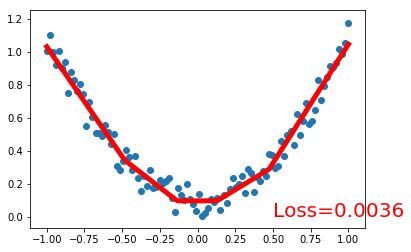

Loss=0.0036
Loss=0.0036
Loss=0.0036
Loss=0.0036


In [22]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.5)
loss_func = torch.nn.MSELoss()

plt.ion()   # 画图
plt.show()
for t in range(100):
    prediction = net(x)
    loss = loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()#反向传播
    optimizer.step()#优化梯度
    print('Loss=%.4f' % loss.data.numpy())
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
